In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
dataset_train = pd.read_csv('dataset/Google_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
dataset_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,533.709833,151.904442,279.12,404.115,537.47,654.9225,816.68
High,1258.0,537.880223,153.008811,281.21,406.765,540.75,662.5875,816.68
Low,1258.0,529.007409,150.552807,277.22,401.765,532.99,644.8000,805.14


In [8]:
#here we are taking the open column of the dataset. If we don't add .values then we will get data in series format.
training_set = dataset_train.iloc[:,1]

In [9]:
type(training_set)

pandas.core.series.Series

In [10]:
#here we have used the values key word to convert dataset_train into numpy array.[1:] and [1:2] have some difference in them.
#In the latter one each element is in an array.
training_set = dataset_train.iloc[:,1].values
print(type(training_set))
print(training_set)
print(training_set[0])

<class 'numpy.ndarray'>
[325.25 331.27 329.83 ... 793.7  783.33 782.75]
325.25


In [11]:
training_set = dataset_train.iloc[:,1:2].values
print(type(training_set))
print(training_set)
print('----')
print(training_set[0])

<class 'numpy.ndarray'>
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
----
[325.25]


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [14]:
X_train = []
y_train = []

In [15]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
#here we are converting the list into numpy array.
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
print(X_train)
print('--------')
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
--------
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [17]:
X_train.shape

(1198, 60)

In [18]:
#here we are reshaping the dataset so that it can be accepted by the neural network. RNN requires this type of dimensions.
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [19]:
X_train.shape

(1198, 60, 1)

In [27]:
print(X_train[0])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]


In [29]:
print(len(X_train))
print(len(X_train[0]))

1198
60


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [33]:
regressor = Sequential()

In [34]:
#here return sequences mean that this value will be returned for the updation of weights.
#and also we are adding a dropout regularization in order to prevent overfitting.
regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [35]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [44]:
regressor.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 19s 153ms/step - loss: 0.0819
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0039
Epoch 13/100


In [4]:
dataset_test = pd.read_csv('dataset/Google_Stock_Price_Test.csv')

In [37]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [38]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [39]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [43]:
print(type(real_stock_price))
print(real_stock_price)
print(len(real_stock_price))

<class 'numpy.ndarray'>
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
20


In [5]:
#Here we are doing vertical concatenation as we need the data from the both the training and test dataset in order to predict 
#stocks of the month of January.
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [6]:
dataset_total.head(1258)

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [54]:
dataset_total.head(1259)

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
Name: Open, Length: 1259, dtype: float64

In [7]:
#here we are getting the whole
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [69]:
print(type(inputs))
print(inputs)

<class 'numpy.ndarray'>
[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


In [8]:
#Converting the data so that it can be accepted by the neural network.
inputs = inputs.reshape(-1,1)

In [10]:
len(inputs)

80

In [71]:
print(type(inputs))
print(inputs)

<class 'numpy.ndarray'>
[[779.  ]
 [779.66]
 [777.71]
 [786.66]
 [783.76]
 [781.22]
 [781.65]
 [779.8 ]
 [787.85]
 [798.24]
 [803.3 ]
 [795.  ]
 [804.9 ]
 [816.68]
 [806.34]
 [801.  ]
 [808.35]
 [795.47]
 [782.89]
 [778.2 ]
 [767.25]
 [750.66]
 [774.5 ]
 [783.4 ]
 [779.94]
 [791.17]
 [756.54]
 [755.6 ]
 [746.97]
 [755.2 ]
 [766.92]
 [771.37]
 [762.61]
 [772.63]
 [767.73]
 [764.26]
 [760.  ]
 [771.53]
 [770.07]
 [757.44]
 [744.59]
 [757.71]
 [764.73]
 [761.  ]
 [772.48]
 [780.  ]
 [785.04]
 [793.9 ]
 [797.4 ]
 [797.34]
 [800.4 ]
 [790.22]
 [796.76]
 [795.84]
 [792.36]
 [790.9 ]
 [790.68]
 [793.7 ]
 [783.33]
 [782.75]
 [778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [72]:
inputs = sc.transform(inputs)

In [74]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

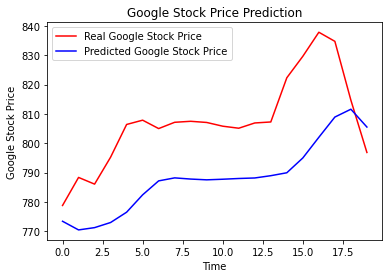

In [75]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()